In [9]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [10]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [11]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([8, 1, 5, 2, 9, 6, 3, 7, 0]), tensor([ 4, 10]))

In [12]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [13]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[5.0030],
        [5.9419]], grad_fn=<AddmmBackward0>)

In [14]:
linear_model.weight

Parameter containing:
tensor([[0.7760]], requires_grad=True)

In [15]:
linear_model.bias

Parameter containing:
tensor([0.6343], requires_grad=True)

In [16]:
x = torch.ones(1)
linear_model(x)

tensor([1.4103], grad_fn=<ViewBackward0>)

In [17]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.4103],
        [1.4103],
        [1.4103],
        [1.4103],
        [1.4103],
        [1.4103],
        [1.4103],
        [1.4103],
        [1.4103],
        [1.4103]], grad_fn=<AddmmBackward0>)

In [18]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [19]:
linear_model.parameters()

<generator object Module.parameters at 0x0000020F63648740>

In [20]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.4288]], requires_grad=True),
 Parameter containing:
 tensor([-0.0768], requires_grad=True)]

In [21]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [22]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 113.2584, Validation loss 189.6112
Epoch 1000, Training loss 3.4282, Validation loss 4.2507
Epoch 2000, Training loss 2.8864, Validation loss 3.3527
Epoch 3000, Training loss 2.8758, Validation loss 3.2470

Parameter containing:
tensor([[5.2911]], requires_grad=True)
Parameter containing:
tensor([-16.8851], requires_grad=True)


In [33]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 208.3682, Validation loss 350.9685
Epoch 1000, Training loss 3.4254, Validation loss 4.2477
Epoch 2000, Training loss 2.8863, Validation loss 3.3524
Epoch 3000, Training loss 2.8758, Validation loss 3.2470
Epoch 4000, Training loss 2.8756, Validation loss 3.2327
Epoch 5000, Training loss 2.8756, Validation loss 3.2307
Epoch 6000, Training loss 2.8756, Validation loss 3.2305
Epoch 7000, Training loss 2.8756, Validation loss 3.2305
Epoch 8000, Training loss 2.8756, Validation loss 3.2305
Epoch 9000, Training loss 2.8756, Validation loss 3.2305
Epoch 10000, Training loss 2.8756, Validation loss 3.2305

Parameter containing:
tensor([[5.2993]], requires_grad=True)
Parameter containing:
tensor([-16.9301], requires_grad=True)


In [24]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [25]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [26]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [27]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [28]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [29]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.0804], requires_grad=True)

In [30]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 159.7235, Validation loss 269.1115
Epoch 1000, Training loss 7.2241, Validation loss 5.6655
Epoch 2000, Training loss 3.0621, Validation loss 2.0022
Epoch 3000, Training loss 2.2490, Validation loss 1.2223
Epoch 4000, Training loss 2.0980, Validation loss 1.0082
Epoch 5000, Training loss 2.0659, Validation loss 0.9577
output tensor([[12.3631],
        [20.9217]], grad_fn=<AddmmBackward0>)
answer tensor([[11.],
        [21.]])
hidden tensor([[ 1.8779e-01],
        [ 1.4551e-01],
        [-1.8326e-01],
        [-9.9118e-03],
        [-7.3477e-02],
        [ 6.7487e-05],
        [-2.2611e-01],
        [ 2.6521e-01]])


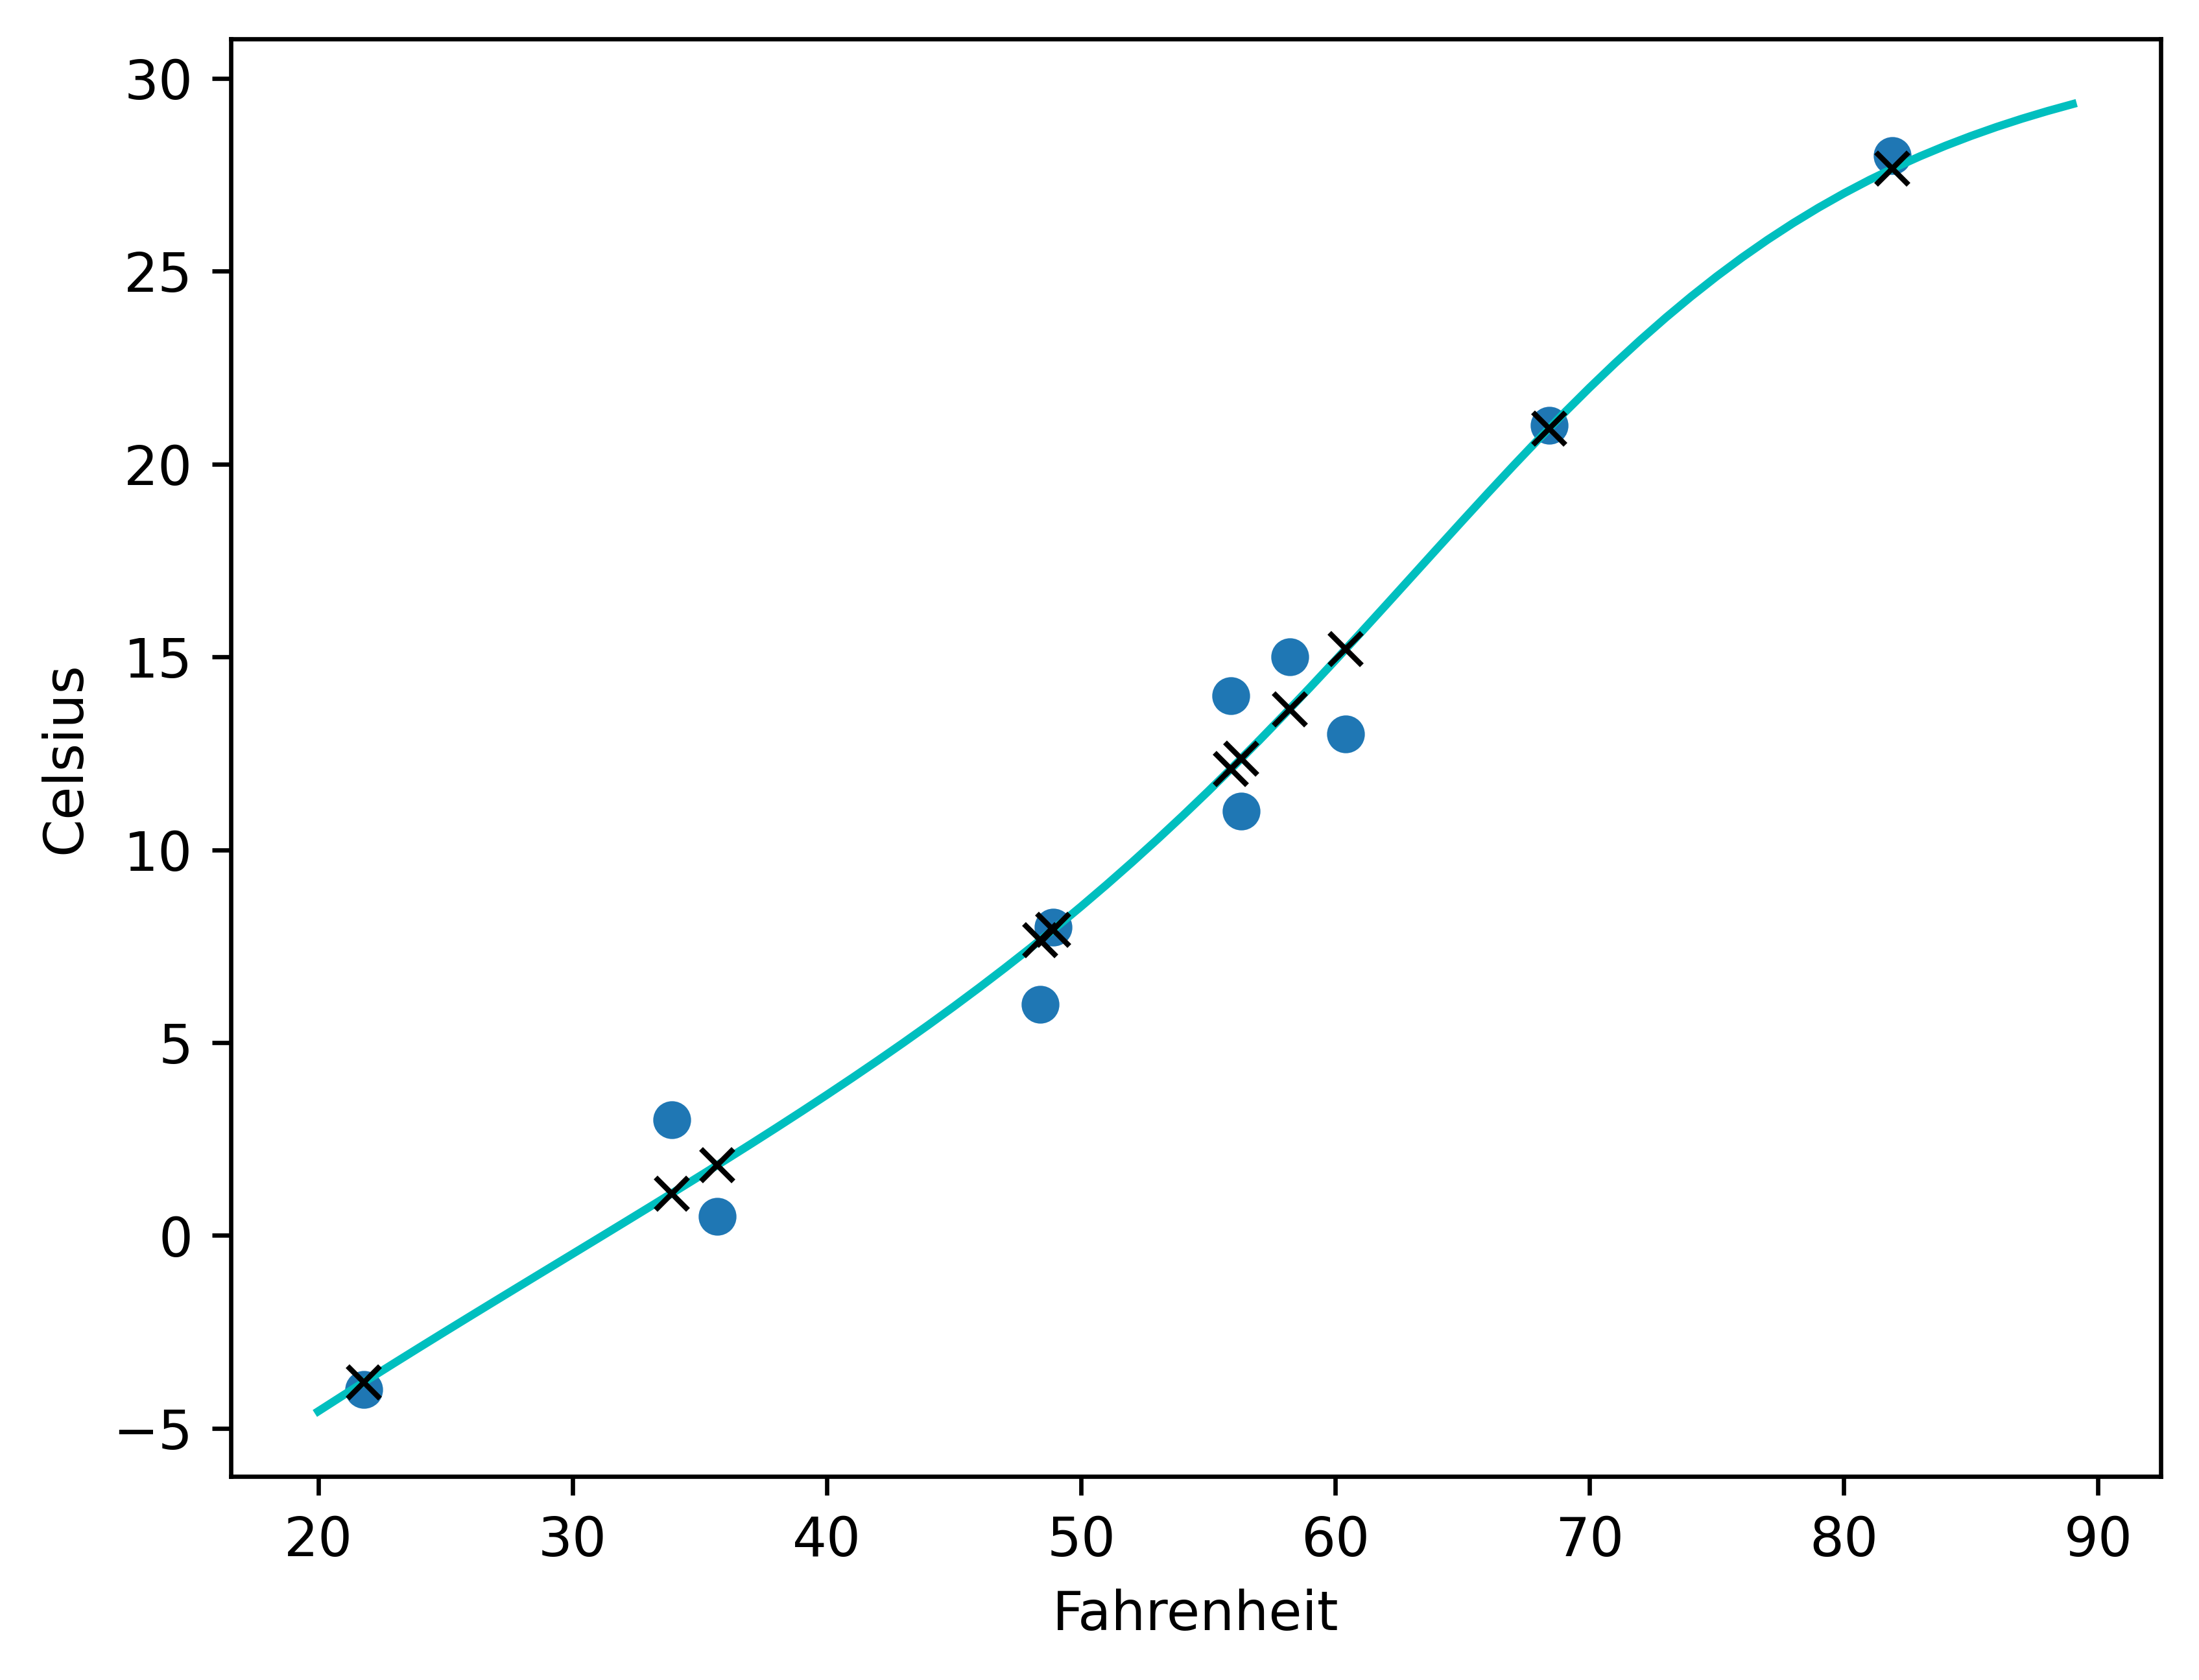

In [31]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 162.3259, Validation loss 273.7223
Epoch 1000, Training loss 59.4870, Validation loss 56.5992
Epoch 2000, Training loss 43.2307, Validation loss 38.7229
Epoch 3000, Training loss 28.5166, Validation loss 25.5875
Epoch 4000, Training loss 17.4100, Validation loss 15.8770
Epoch 5000, Training loss 10.6607, Validation loss 9.7903


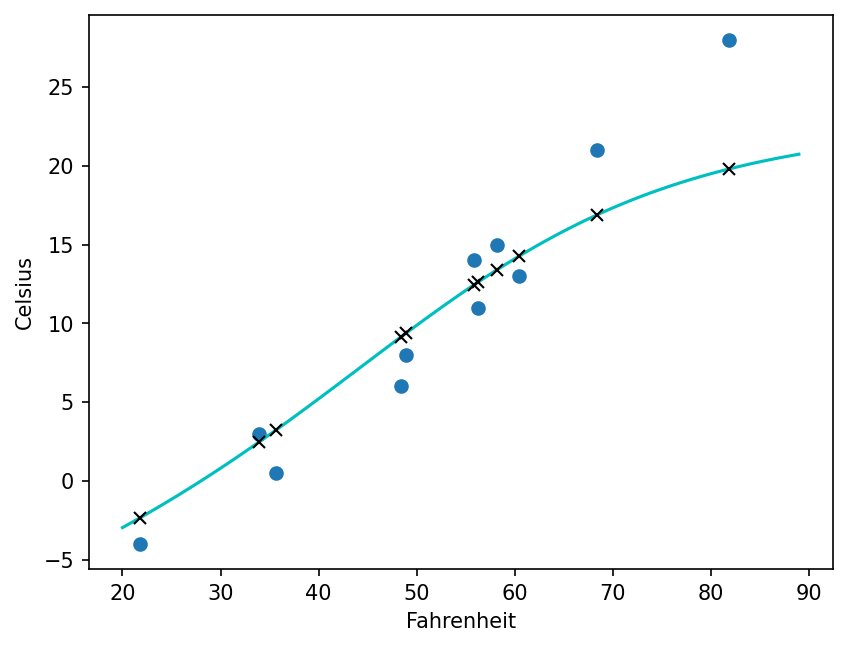

In [32]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
